In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lifelines as ll
import seaborn as sns
from scipy.stats import ttest_ind

## 1. Loading data
Data is available from the EDMOND repository [Modulation of behavior in zebrafish by the neuropeptide PTH2](https://dx.doi.org/10.17617/3.6v). Individual data files should be placed within the same folder as the scripts, otherwise, file locations need to be updated in the cell below.

In [4]:
# dataframe containing survival data
df = pd.read_excel(r'.\SurvivalRate.xlsx' ,
                  sheet_name = 'Import')

# dataframe containing body length measurements
df2 = pd.read_excel(r'.\BodyLength.xlsx' ,
                  sheet_name = 'Import')

## 2. Fit Kaplan-Meier estimator
The lifelines library used in this script is hosted [here](https://lifelines.readthedocs.io/en/latest/) and can be installed via

<code>pip install lifelines<\code>
    
    or
    
<code>conda install -c conda-forge lifelines<\code>   
    
    when working with the Anaconda platform.

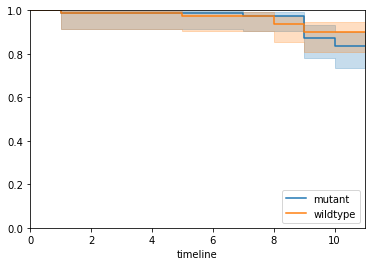

In [5]:
ax = plt.subplot(111)
kmf = ll.KaplanMeierFitter()

for name, grouped_df in df.groupby('group'):
    kmf.fit(grouped_df["duration"], grouped_df["death"], label= name)
    kmf.plot_survival_function(ax=ax , ylim = (0, 1) )
    
ax.legend(bbox_to_anchor=(1,0), loc="lower right")

## 3. Determine restricted mean survival times (RMST) 

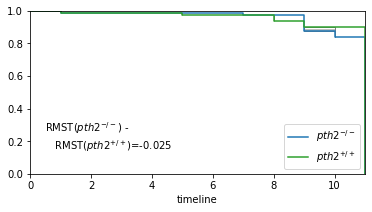

In [8]:
kmf_mut = ll.KaplanMeierFitter()
kmf_mut.fit(df[df['group'] == 'mutant']['duration'] , df[df['group'] == 'mutant']['duration'] , label = '$pth2^{-/-}$')

kmf_ctr = ll.KaplanMeierFitter()
kmf_ctr.fit(df[df['group'] == 'wildtype']['duration'] , df[df['group'] == 'wildtype']['duration'] , label = '$pth2^{+/+}$')

fig, ax = plt.subplots(figsize = (6,3) )
ll.plotting.rmst_plot(kmf_mut, model2=kmf_ctr, ax=ax)
ax.legend(bbox_to_anchor=(1,0), loc="lower right")

## Statistical analysis

In [9]:
ix = df['group'] == 'mutant'
T_exp, E_exp = df.loc[ix, 'duration'], df.loc[ix, 'death']
T_con, E_con = df.loc[~ix, 'duration'], df.loc[~ix, 'death']


results = ll.statistics.logrank_test(T_exp, T_con, event_observed_A=E_exp, event_observed_B=E_con)
results.print_summary()


print(results.p_value)        # 0.283
print(results.test_statistic) # 1.151

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.15 0.28      1.82

0.2832409656119932
1.1514732187143017


## 4. Comparison of body length

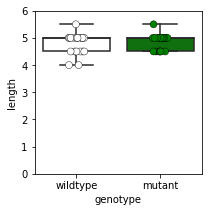

In [21]:
fig, ax = plt.subplots(figsize = (3,3))
sns.boxplot(x = 'genotype' , y = 'length' , data = df2 , showfliers = 0 , palette = ['w' , 'g'])
sns.stripplot(x = 'genotype' , y = 'length' , data = df2 , size = 7 , palette = ['w' , 'g'] , edgecolor = 'k' , linewidth = 0.4)
plt.ylim(0,6)
plt.savefig('pth2_length.svg' , bbox_inches = 'tight')

In [49]:
ttest_ind(df2[df2['genotype'] == 'wildtype']['length'] , 
          df2[df2['genotype'] == 'mutant']['length'])

Ttest_indResult(statistic=-0.7060752608982053, pvalue=0.4844480368802785)